In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats
import seaborn as sns
sns.set(style='ticks', context='paper', font_scale=2)
red, blue, green, purple, orange, yellow = sns.color_palette('Set1', 6)
from IPython.display import display_latex


import sys
sys.path.append('../src/')
from simulation import *
from plots import *

In [2]:
from sympy import *
init_printing()

In [3]:
def fig_xlabel(fig, label, x=0.5, y=0):
    return fig.text(x, y, label, horizontalalignment='center', verticalalignment='bottom')

def fig_ylabel(fig, label, x=0, y=0.5):
    return fig.text(x, y, label, rotation='vertical', horizontalalignment='right', verticalalignment='center')

def fig_panel_labels(axes, letters='ABCDEFGHIJKLMNOP', xcoord=-0.17, ycoord=0.92, panel_label_size=plt.rcParams[ 'axes.titlesize']*1.3):
    return [
        ax.annotate(letter, (xcoord, ycoord), xycoords='axes fraction', fontsize=panel_label_size)
        for ax, letter 
        in zip(axes.flat, letters)
    ]

## Recurrence illustration

In [79]:
def recurrence(x, ρ, W, w):
    return x * ((1 - ρ) * (W - w) * x + ρ * W + (1 - ρ) * w) / ((W - w) * x + w)

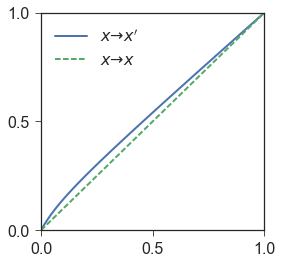

In [80]:
fig, ax = plt.subplots(figsize=(4, 4))
x = np.linspace(0, 1)
xx = recurrence(x, 0.1, 1.0, 0.1)
ax.plot(x, xx, lw=2, label=r"$x \to x'$")
ax.plot(x, x, ls='--', lw=2, label=r"$x \to x$")
ax.set(
    xlim=(0, 1),
    ylim=(0, 1),
    xticks=np.linspace(0, 1, 3),
    yticks=np.linspace(0, 1, 3),
)
ax.legend()
fig.savefig('../figures/recurrence_example.pdf', dpi=300)

## Environment _A1B1_

In [81]:
x, W, w, ρ = symbols('x W w ρ')
a = (1 - ρ) * (W - w)
b = ρ * W + (1 - ρ) * w
c = W - w
d = w
α = -a 
β = -b + W + w
γ = -c
δ = W

In [82]:
xx = x * (a * x + b)/(c * x + d)
xx

In [83]:
solveset(xx - x, x)

         ⎧ -w  ⎫
{0, 1} \ ⎨─────⎬
         ⎩W - w⎭

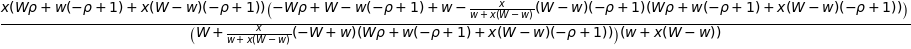

In [84]:
xxx = xx  * (α * xx + β) / (γ * xx + δ)
xxx

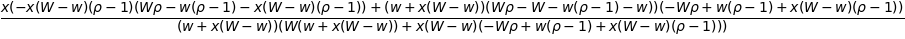

In [85]:
xxx = simplify(xxx)
xxx

In [86]:
sols = solveset(xxx - x, x)
sols

⎧                                _____________________________________________
⎪                               ╱  2  2      2      2          2              
⎨      -W⋅ρ + W + w⋅ρ - 3⋅w - ╲╱  W ⋅ρ  - 2⋅W ⋅ρ + W  - 2⋅W⋅w⋅ρ  + 4⋅W⋅w⋅ρ + 2
⎪0, 1, ───────────────────────────────────────────────────────────────────────
⎩                                          -2⋅W⋅ρ + 4⋅W + 2⋅w⋅ρ - 4⋅w         
                                                                              
                                                                              

___________________________                            _______________________
        2  2      2      2                            ╱  2  2      2      2   
⋅W⋅w + w ⋅ρ  - 2⋅w ⋅ρ + w    -W⋅ρ + W + w⋅ρ - 3⋅w + ╲╱  W ⋅ρ  - 2⋅W ⋅ρ + W  - 
───────────────────────────, ─────────────────────────────────────────────────
                                                                 -2⋅W⋅ρ + 4⋅W 
                                                   

In [87]:
print(sols)

{0, 1, (-W*ρ + W + w*ρ - 3*w - sqrt(W**2*ρ**2 - 2*W**2*ρ + W**2 - 2*W*w*ρ**2 + 4*W*w*ρ + 2*W*w + w**2*ρ**2 - 2*w**2*ρ + w**2))/(-2*W*ρ + 4*W + 2*w*ρ - 4*w), (-W*ρ + W + w*ρ - 3*w + sqrt(W**2*ρ**2 - 2*W**2*ρ + W**2 - 2*W*w*ρ**2 + 4*W*w*ρ + 2*W*w + w**2*ρ**2 - 2*w**2*ρ + w**2))/(-2*W*ρ + 4*W + 2*w*ρ - 4*w)} \ {-w/(W - w), -sqrt((ρ - 1)*(W**2*ρ - W**2 - 2*W*w*ρ - 2*W*w + w**2*ρ - w**2))*(-W + w)/(2*(W**2*ρ - W**2 - 2*W*w*ρ + 2*W*w + w**2*ρ - w**2)) + 1/2, sqrt((ρ - 1)*(W**2*ρ - W**2 - 2*W*w*ρ - 2*W*w + w**2*ρ - w**2))*(-W + w)/(2*(W**2*ρ - W**2 - 2*W*w*ρ + 2*W*w + w**2*ρ - w**2)) + 1/2}


In [108]:
sol0, sol1, sol2, sol3 = 0, 1, (-W*ρ + W + w*ρ - 3*w - sqrt(
    W**2*ρ**2 - 2*W**2*ρ + W**2 - 2*W*w*ρ**2 + 4*W*w*ρ + 2*W*w + w**2*ρ**2 - 2*w**2*ρ + w**2
))/(-2*W*ρ + 4*W + 2*w*ρ - 4*w), (-W*ρ + W + w*ρ - 3*w + sqrt(
    W**2*ρ**2 - 2*W**2*ρ + W**2 - 2*W*w*ρ**2 + 4*W*w*ρ + 2*W*w + w**2*ρ**2 - 2*w**2*ρ + w**2
))/(-2*W*ρ + 4*W + 2*w*ρ - 4*w)

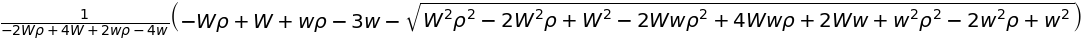

In [109]:
sol2

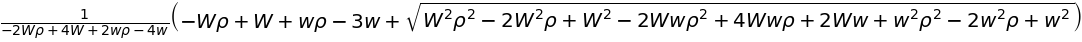

In [110]:
sol3

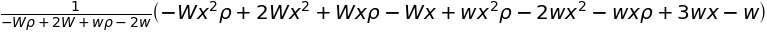

In [111]:
simplify((x-sol2)*(x-sol3))

True


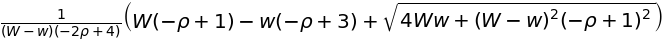

In [112]:
sol3_nicer = (
    (W*(1-ρ) -w*(3-ρ) + sqrt((W-w)**2 * (1-ρ)**2 + 4*W*w))/(2*(2-ρ)*(W-w))
)
print(simplify(sol3 - sol3_nicer) == 0)
sol3_nicer

In [113]:
print_python(sol3_nicer)

W = Symbol('W')
ρ = Symbol('ρ')
w = Symbol('w')
e = (W*(-ρ + 1) - w*(-ρ + 3) + sqrt(4*W*w + (W - w)**2*(-ρ + 1)**2))/((W - w)*(-2*ρ + 4))


In [114]:
latex(sol3_nicer)

'\\frac{1}{\\left(W - w\\right) \\left(- 2 ρ + 4\\right)} \\left(W \\left(- ρ + 1\\right) - w \\left(- ρ + 3\\right) + \\sqrt{4 W w + \\left(W - w\\right)^{2} \\left(- ρ + 1\\right)^{2}}\\right)'

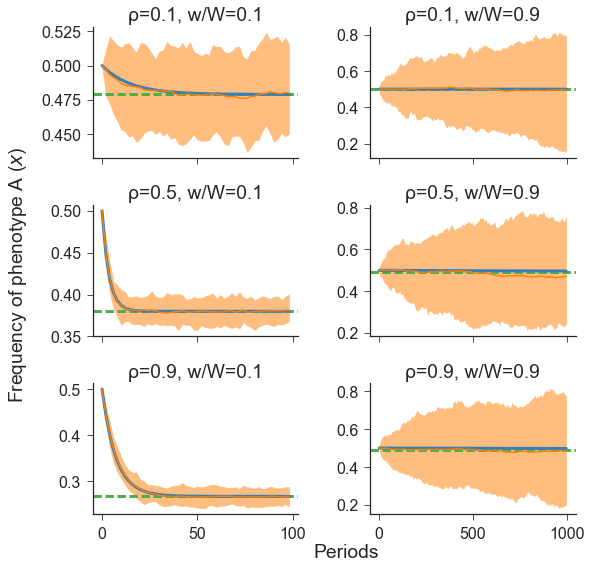

In [160]:
N = 10000
ns = [100, 1000]
ρs = [0.1, 0.5, 0.9]
ws = [0.1, 0.9]
W_ = 1.0
fig, axes = plt.subplots(len(ρs), len(ws), figsize=(8, 8), sharex='col', sharey=False)

for i, ρ_ in enumerate(ρs):
    for j, w_ in enumerate(ws):
        ax = axes[i, j]
        n = ns[j]
        # analytic solution
        subs = [(ρ, ρ_), (W, W_), (w, w_)]
        sol2_ = sol2.subs(subs)
        sol3_ = sol3.subs(subs)
#         print("ρ={}, W={}, w={}, sol2={}, sol3={}".format(ρ_, W_, w_, sol2_, sol3_))
        sol = float(sol3_)
        ax.axhline(sol, color=green, lw=3, ls='--', label='Equilibrium')
        # deterministic
        x_ = np.empty(n)
        x_[0] = 0.5
        x_[1] = recurrence(x_[0], ρ_, w_, W_)
        for t in range(2, n, 2):
            x_[t-1] = recurrence(x_[t-2], ρ_, W_, w_)
            x_[t] = recurrence(x_[t-1], ρ_, w_, W_)
        ax.plot(range(0, n, 2), x_[::2], color=blue, lw=3, label='Deterministic')
        # WF
        reps = 100
        x_ = np.empty((n, reps))
        x_[0, :] = 0.5
        x_[1, :] = recurrence(x_[0, :], ρ_, w_, W_)
        x_[1, :] = np.random.binomial(N, x_[1, :]) / N
        for t in range(2, n, 2):
            x_[t-1, :] = recurrence(x_[t-2, :], ρ_, W_, w_)
            x_[t-1, :] = np.random.binomial(N, x_[t-1, :]) / N
            x_[t, :] = recurrence(x_[t-1, :], ρ_, w_, W_)
            x_[t, :] = np.random.binomial(N, x_[t, :]) / N
        ax.fill_between(range(0,n,2), 
                         np.percentile(x_, 99.5, axis=1)[::2], np.percentile(x_, 0.5, axis=1)[::2], 
                         alpha=0.5, color=orange)
        ax.plot(range(0, n, 2), x_.mean(axis=1)[::2], color=orange, label='Wright-Fisher')
        # styling
        ax.set_title(r'ρ={}, w/W={}'.format(ρ_, w_/W_))
        ax.legend().set_visible(False)

# for i in range(2): axes[i,0].set_yticks([0.497, 0.498, 0.499, 0.5])
# for i in range(2): axes[i,1].set_yticks([0.47, 0.48, 0.49, 0.5])

# axes[0,1].legend(loc='center right').set_visible(True)
for i in range(2): axes[0, i].set_xlabel('')
for i in range(2): axes[1, i].set_xlabel('')
for i in range(2): axes[i, 1].set_ylabel('')
for i in range(2): axes[i, 0].set_ylabel('')

xlabel = fig_xlabel(fig, 'Periods', x=0.55)
ylabel = fig_ylabel(fig, 'Frequency of phenotype A ($x$)')
# fig_panel_labels(axes, ycoord=0.995)
fig.tight_layout()
sns.despine()
fig.savefig('../figures/env_A1B1.pdf', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight');

## Environment _AABAAB_

(1.0, 0.0, 0.01) (667, 5)
(1.0, 0.0, 0.10000000000000001) (67, 5)
(1.0, 0.10000000000000001, 0.01) (667, 5)
(1.0, 0.10000000000000001, 0.10000000000000001) (67, 5)


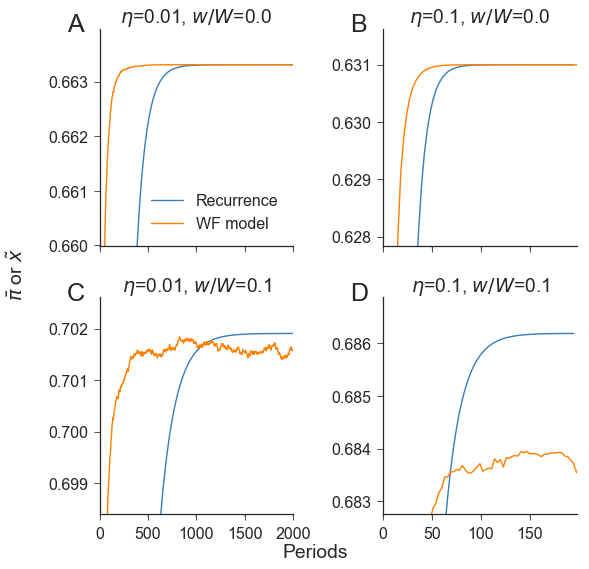

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex='col', sharey=False)

agg = df[df['π0'] == 'U'].groupby(['ω0', 'ω1', 'η1', 't']).agg(np.mean)['π'].reset_index()
for (key, grp), ax in zip(agg[agg['t'] % 3 == 0].groupby(['ω0', 'ω1', 'η1']), axes.flat):
    ωA_, ωB_, η_ = key
    n = grp['t'].max()  
    # iteration
    x_ = np.zeros(n)
    x_[0] = 0.5
    for t in range(1, n):
        if t % 3:
            x_[t] = x_[t-1] * (x_[t-1]*(1 - η_)*(ωA_ - ωB_) + η_*ωA_ + (1 - η_)*ωB_) / (x_[t-1]*(ωA_ - ωB_) + ωB_)
        else:
            x_[t] = x_[t-1] * (x_[t-1]*(1 - η_)*(ωB_ - ωA_) + η_*ωB_ + (1 - η_)*ωA_) / (x_[t-1]*(ωB_ - ωA_) + ωA_)
    ax.plot(range(0, n, 3), x_[::3], color=blue, label='Recurrence')
    # simulations
    grp.plot('t', 'π', color=orange, ax=ax, label='WF model')  
    print(key, grp.shape)
    # styling
    ax.set_title('$\eta$={}, $w/W$={}'.format(η_, ωB_/ωA_))
    ax.set_ylim(x_[::3][-1] * 0.995, x_[::3][-1]*1.001)
    ax.legend().set_visible(False)
    
for i in range(2): axes[0, i].set_xlabel('')
for i in range(2): axes[1, i].set_xlabel('')
for i in range(2): axes[i, 1].set_ylabel('')
for i in range(2): axes[i, 0].set_ylabel('')

xlabel = fig_xlabel(fig, 'Periods')
ylabel = fig_ylabel(fig, r'$\bar{\pi}$ or $\tilde{x}$')
fig_panel_labels(axes, ycoord=0.985)
axes[0,0].legend().set_visible(True)

fig.tight_layout()
sns.despine()
fig.savefig('../figures/env_A2B1.pdf', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight');

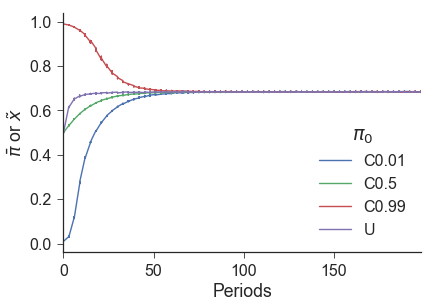

In [67]:
fig, ax = plt.subplots()
_df = df[(df['ω0'] == ωA_) & (df['ω1'] == ωB_) & (df['η1'] == η_)]
for (π0_, grp) in _df[_df['t'] % 3 == 0].groupby('π0'):
    grp.sort_values('t').plot('t', 'π', ax=ax, label=π0_)  
ax.set_xlabel('Periods')
ax.set_ylabel(r'$\bar{\pi}$ or $\tilde{x}$')
ax.legend(title='$\pi_0$')
sns.despine()

### Closer look at full π distribution

In [4]:
def plot_simulation_k_l(π0, env, period, N, n, η, ω0, ω1, 
                        nbins=101, ax=None, save=False, title=True):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ϵ = parse_env(env, n)
    π = simulation(N=N, n=n, η=η, μ=0, ω0=ω0, ω1=ω1, 
                   ϵ=ϵ, π0=parse_π0(π0))
    π = π[::period]
    ϵ = ϵ[::period]

    bins = np.linspace(0, 1, nbins)
    freq = np.array([
        np.histogram(π[t,:], bins=bins)[0] 
        for t in range(n//period)
    ])
    aspect = freq.shape[0]/freq.shape[1]
    im = ax.imshow(freq.T, aspect=aspect, cmap='viridis', 
                   origin=(0,0), vmin=0, vmax=N//(nbins//10))
    if title:
        ax.set_title('{}, π0={}\nη={}, ω0={}, ω1={}'.format(env, π0, η, ω0, ω1))
    ax.set(
        ylabel='$\pi$',
        yticks=np.linspace(0, nbins, 6, dtype=int),
        yticklabels=map(
            lambda x: round(x, 2),
            bins[np.linspace(0, nbins, 6, dtype=int)[:-1]].tolist() + [1]
        ),
        xlabel='Time x {}'.format(period)
    )
    sns.despine()
    if save: fig.savefig('figures/{}_π0_{}_η_{}_ω0_{}_ω1_{}.png'.format(
        env, π0, η, ω0, ω1
    ))
    return π, freq, ax

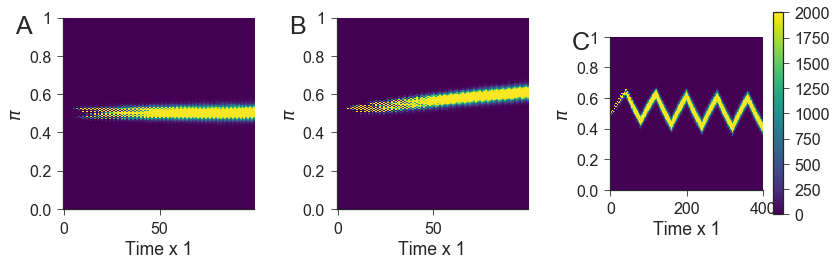

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plot_simulation_k_l(
    π0='C0.5',
    env='A1B1',
    period=1,
    n=100,
    N=100000,
    η=0.01,
    ω0=1.0,
    ω1=0.1,
    nbins=500,
    save=False,
    ax=axes[0],
    title=False
)
plot_simulation_k_l(
    π0='C0.5',
    env='A2B1',
    period=1,
    n=100,
    N=100000,
    η=0.01,
    ω0=1.0,
    ω1=0.1,
    nbins=500,
    save=False,
    ax=axes[1],
    title=False
)
plot_simulation_k_l(
    π0='C0.5',
    env='A40B40',
    period=1,
    n=400,
    N=100000,
    η=0.01,
    ω0=1.0,
    ω1=0.1,
    nbins=500,
    save=False,
    ax=axes[2],
    title=False
)
im = next(filter(lambda _: isinstance(_, mpl.image.AxesImage), axes[2].get_children()))
fig.colorbar(im, ax=axes[2])
fig_panel_labels(axes, xcoord=-0.25)
fig.tight_layout()
fig.savefig('../figures/env_period_overview.pdf')

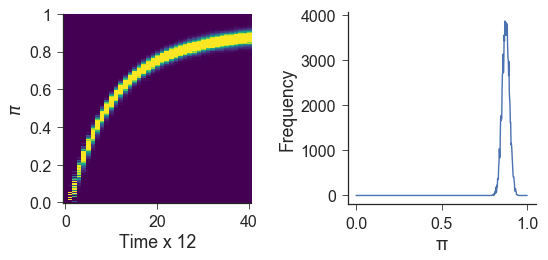

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
π, freq, _ = plot_simulation_k_l(
    π0='C0.01',
    env='A10B2',
    period=12,
    n=500,
    N=100000,
    η=0.01,
    ω0=1.0,
    ω1=0.1,
    nbins=500,
    save=False,
    title=False,
    ax=axes[0]
)

ax = axes[1]
πhist = freq[-1,:]
ax.plot(np.linspace(0, 1, len(πhist)), πhist)
ax.set(xlabel='π', ylabel='Frequency')

fig.tight_layout()
sns.despine()
fig.savefig('../figures/env_A10_B2.pdf')

## Recurrence iteration with k,l

In [68]:
def iterate(x, η, ωA, ωB):
    return x * (x*(1 - η)*(ωA - ωB) + η*ωA + (1 - η)*ωB) / (x*(ωA - ωB) + ωB)

In [69]:
%load_ext Cython

In [70]:
def recurrence(x0, n, k, l, η, ωA, ωB):
    t = 0
    x = np.empty(n)
    x[0] = x0
    while t < n:
        try:
            for i in range(k):
                x[t+i+1] = iterate(x[t+i], η, ωA, ωB)
            for j in range(l):
                x[t+k+j+1] = iterate(x[t+k+j], η, ωB, ωA)
            t += k + l
        except IndexError:
            break
    return x

In [97]:
def plot_recurrence_k_l(k, l, x0, η, ωA, ωB, cycles=50, legend=False, 
                        title=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = recurrence(x0, cycles*(k+l), k, l, η, ωA, ωB)
    ax.plot(x[::(k + l)], label=x0)
    if title:
        ax.set_title('k={}, l={}'.format(k, l))
    ax.set(
        xlabel=r'Periods ($\tau$={})'.format(k+l),
        ylabel=r'$\bar{\pi}$',
        ylim=(0,1)
    )
    if legend: ax.legend(title=r'$\pi_i(t=0)$', loc='lower right')
    sns.despine()
    return x, ax

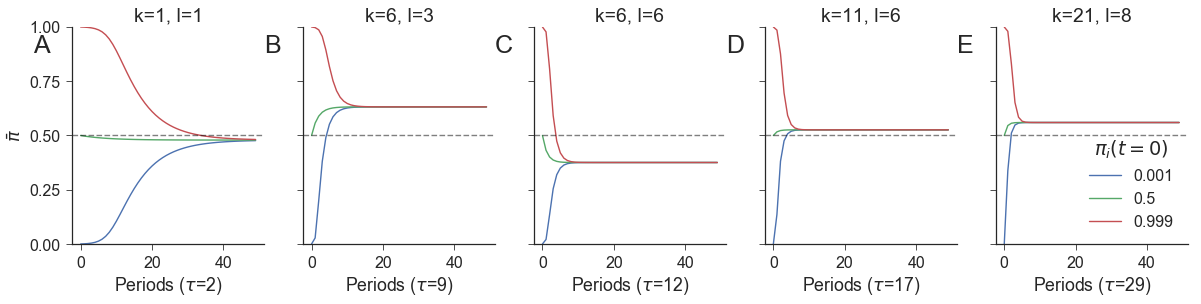

In [98]:
η, ωA, ωB = 0.1, 1.0, 0.1
K = [1, 6, 6, 11, 21]
L = [1, 3, 6, 6, 8]
fig, axes = plt.subplots(1, len(K), figsize=(20, 4), sharex=True, sharey=True)
for k, l, ax in zip(K, L, axes):
    for x0 in [0.001, 0.5, 0.999]:
        plot_recurrence_k_l(k, l, x0, η, ωA, ωB, ax=ax)
    ax.axhline(0.5, ls='--', color='k', alpha=0.5)
    if i > 0: ax.set(ylabel='')
axes[0].set_ylabel(r'$\bar{\pi}$')
axes[0].set_yticks(np.linspace(0, 1, 5))
axes[-1].legend(title=r'$\pi_i(t=0)$', loc='lower right')
fig_panel_labels(axes, xcoord=-0.2, ycoord=0.88);

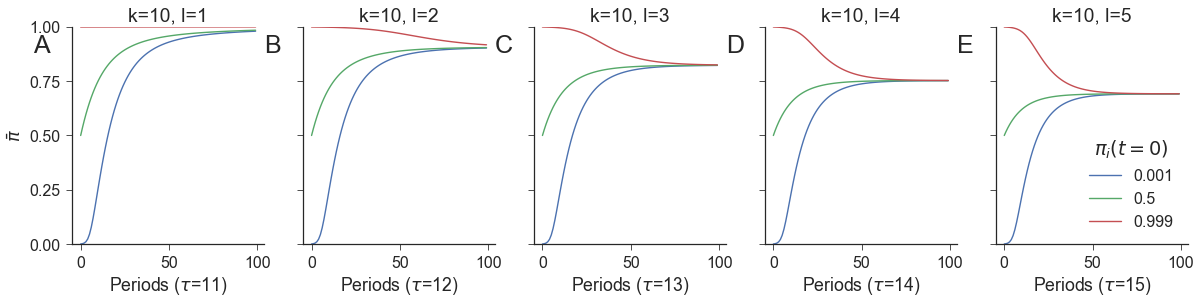

In [100]:
η, ωA, ωB = 0.01, 1.0, 0.1
K = [10,10,10,10,10]
L = [1,2,3,4,5]
fig, axes = plt.subplots(1, len(K), figsize=(20, 4), 
                         sharex=True, sharey=True)
for i, k, l, ax in zip(range(len(axes)), K, L, axes):
    for x0 in [0.001, 0.5, 0.999]:
        plot_recurrence_k_l(k, l, x0, η, ωA, ωB, cycles=100, ax=ax)
        if i > 0: ax.set_ylabel('') 
axes[0].set_ylabel(r'$\bar{\pi}$')
axes[0].set_yticks(np.linspace(0, 1, 5))
axes[-1].legend(title=r'$\pi_i(t=0)$', loc='lower right')
fig_panel_labels(axes, xcoord=-0.2, ycoord=0.88);

## Compare stochastic and deterministic models

True
0.996243248251
False
0.909873347612


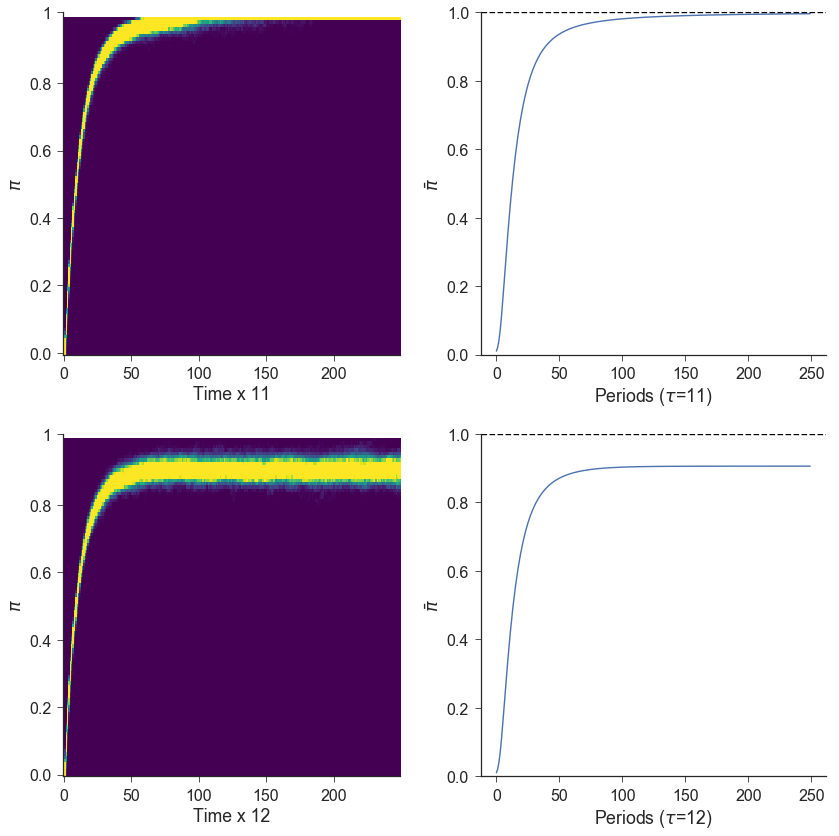

In [101]:
cycles = 250
N = 10000
η = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

k, l = 10, 1
π, freq, _ = plot_simulation_k_l('C0.01', 'A{}B{}'.format(k, l), k+l, N, 
                                 cycles*(k+l), η, 1.0, 0.1, ax=axes[0,0], 
                                 nbins=101, title=False)
print(np.allclose(π[-1,:], 1.0))
x, _ = plot_recurrence_k_l(k, l, 0.01, η, 1.0, 0.1, cycles=cycles, ax=axes[0,1],
                    title=False)
print(x[-1])
axes[1,1].axhline(1, color='k', ls='--')

k, l = 10, 2
π, freq, _ = plot_simulation_k_l('C0.01', 'A{}B{}'.format(k, l), k+l, N, 
                                 cycles*(k+l), η, 1.0, 0.1, ax=axes[1,0], 
                                 nbins=101, title=False)
print(np.allclose(π[-1,:], 1.0))
x, _ = plot_recurrence_k_l(k, l, 0.01, η, 1.0, 0.1, cycles=cycles, ax=axes[1,1],
                    title=False)
print(x[-1])
axes[0,1].axhline(1, color='k', ls='--')
fig.tight_layout()
fig.savefig('../figures/env_A10B1_A10B2.pdf')

## Recurrence with sampling

In [4]:
from beta_binomial import betabinom

In [66]:
N = 10000
ρ = η = 0.01
n = 5000
W = 2
w = 1
x0 = 0.5
ε = np.zeros(n)
ε[np.random.random(n) > 0.5] = 1

x = np.empty(n, dtype=float)
x[0] = x0
y = np.empty(n, dtype=float)
y[0] = x0

for t in range(1, n):
    if ε[t-1] == 0:
        ωA, ωB = W, w
    else:
        ωA, ωB = w, W
    x[t] = recurrence(x[t-1], η, ωA, ωB)
    y[t] = recurrence(y[t-1], η, ωA, ωB)
    
    x[t] = scipy.stats.binom.rvs(N, x[t]) / N

In [67]:
πη = simulation(N, n, η, -1, W, w, lambda N: np.ones(N)*x0, ε)
πρ = simulation(N, n, -1, ρ, W, w, lambda N: np.ones(N)*x0, ε)

../src/simulation.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ω_t = ω[ϵ_, φ]


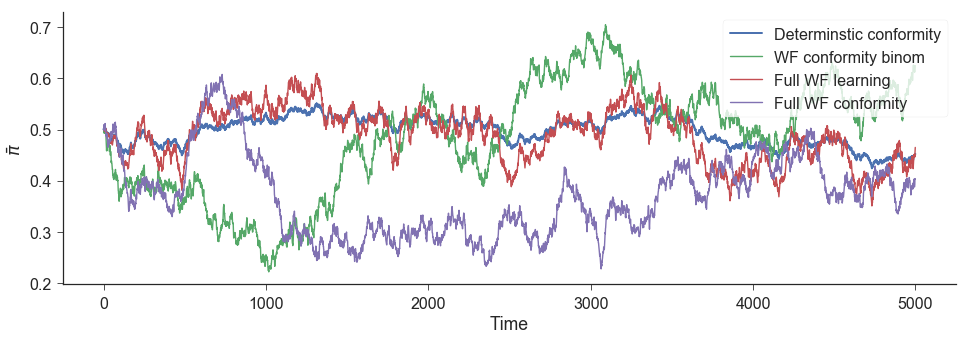

In [68]:
plt.figure(figsize=(16, 5))
plt.plot(y, lw=2, label='Determinstic conformity')
plt.plot(x, label='WF conformity binom')
plt.plot(πη.mean(axis=1), label='Full WF learning')
plt.plot(πρ.mean(axis=1), label='Full WF conformity')
# plt.xlim(0, 1000)
plt.legend(frameon=True)
plt.ylabel(r'$\bar{\pi}$')
# plt.ylim(0.45,1)
plt.xlabel('Time')
sns.despine()

/Users/yoavram/miniconda3/envs/Milpitas/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


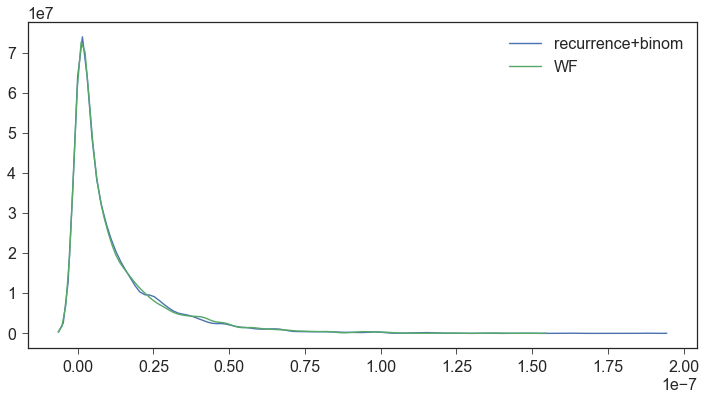

In [69]:
xres = (x[1:] - recurrence(x[:-1], ρ, W, w))**2 / (N*x[:-1] * (1-x[:-1]))
πρres = (πρ.mean(axis=1)[1:] - recurrence(πρ.mean(axis=1)[:-1], ρ, W, w))**2 / (N*πρ.mean(axis=1)[:-1] * (1-πρ.mean(axis=1)[:-1]))

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.distplot(xres, bins=100, hist_kws=dict(alpha=0.5), hist=False, label='recurrence+binom')
sns.distplot(πρres, bins=100, hist=False, hist_kws=dict(alpha=0.5), label='WF')
plt.legend(loc='upper right')

In [63]:
z

array([ 0.5   ,  0.4901,  0.4918, ...,  0.4027,  0.4106,  0.4227])